## Gather

In [1]:
import pandas as pd
import requests
import tweepy
import os
import json
import numpy as np
import re
%matplotlib inline

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [ ]:
consumer_key = #####
consumer_secret = #####
access_token = #####
access_secret = #####

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [3]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
for tweet_id in df_twitter_archive.tweet_id:
    try:
        tweet_json = api.get_status(tweet_id, tweet_mode = 'extented')
        with open('tweet_json.txt', mode='a') as file:
            json.dump(tweet_json, file)
            file.write('\n')
    except Exception as e:
        print(str(tweet_id) + ': ' + str(e))

In [4]:
lists = [] #an empyty list to store a dictionaries
with open('tweet_json.txt') as file:
    lines = file.read().splitlines()
    for line in lines:
        data = json.loads(line)
        row = {
            'tweet_id'      : data['id'],
            'retweet_count' : data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        lists.append(row)
df_tweet_data = pd.DataFrame(lists,columns=['tweet_id','retweet_count','favorite_count'])

In [5]:
df_img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

## Assess

In [6]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8722,39169
1,892177421306343426,6403,33546
2,891815181378084864,4255,25280
3,891689557279858688,8817,42534
4,891327558926688256,9603,40715
5,891087950875897856,3185,20410
6,890971913173991426,2121,11967
7,890729181411237888,19318,66189
8,890609185150312448,4348,28025
9,890240255349198849,7580,32236


In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
tweet_id          2348 non-null int64
retweet_count     2348 non-null int64
favorite_count    2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [12]:
all_columns = pd.Series(list(df_twitter_archive) + list(df_img_predictions) + list(df_tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [13]:
df_twitter_archive.tweet_id.nunique()

2356

In [14]:
df_img_predictions.tweet_id.nunique()

2075

In [15]:
df_tweet_data.tweet_id.nunique()

2348

In [16]:
df_twitter_archive[df_twitter_archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
df_twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
2016,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,None,None,None,None
1925,674063288070742018,NaN,NaN,2015-12-08 03:09:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,None,None,None,None
1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,6,10,None,None,None,None,None
1218,714957620017307648,NaN,NaN,2016-03-29 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,None,None,None,None
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861...,4,10,a,None,None,None,None
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,None,None,None,None
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None


In [19]:
df_twitter_archive.name.isnull().sum()

0

In [20]:
df_twitter_archive.loc[np.random.randint(0,df_twitter_archive.shape[0],40), ['text','name']]

,text,name
686,RT @dog_rates: This is Bo and Ty. Bo eats pape...,Bo
1339,I found a forest Pipsy. 12/10 https://t.co/mIQ...,None
396,This is Sweet Pea. She hides in shoe boxes and...,Sweet
835,Meet Gerald. He's a fairly exotic doggo. Floof...,Gerald
332,RT @EmilieGambril: 12/10 h*cking excited about...,None
51,This is Alfy. You're witnessing his first wate...,Alfy
535,RT @dog_rates: This is Cali. She arrived preas...,Cali
1998,Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,Darby
190,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",None
673,This is Eli. He can fly. 13/10 magical af http...,Eli


In [21]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Jack           6
Jax            6
Bella          6
Stanley        6
Koda           6
Scout          6
Leo            6
Milo           6
Oscar          6
Dave           6
Rusty          6
Bentley        5
            ... 
Mookie         1
Callie         1
Timofy         1
Burt           1
Scruffers      1
Ralphy         1
Andru          1
Loomis         1
Kayla          1
Bradley        1
Peanut         1
Tess           1
Perry          1
Lulu           1
Rumpole        1
Pepper         1
Bertson        1
Gabby          1
Tango          1
Sparky         1
Sundance       1
Berkeley       1
General        1
Snicku         1
Bronte         1
Brudge         1
Orion          1
Luther        

In [22]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
df_img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.348000e+03,2348.000000,2348.000000
mean,7.424145e+17,3074.355196,8113.316865
std,6.837627e+16,5100.195481,12193.020935
min,6.660209e+17,0.000000,0.000000
25%,6.783868e+17,613.500000,1410.000000
50%,7.191522e+17,1435.500000,3570.000000
75%,7.987607e+17,3580.000000,10063.250000
max,8.924206e+17,78380.000000,143564.000000


#### Quality
- Missing and incorrect dog names extracted from text. 'a' is the most popular name which itself is not a name.
- Incorrect Data types for tweet_id and timestamp.
- Source not extracted properly from hyperlink tag.
- A lot of null values are not null.
- Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.
- Gender of dog could be extracted from text.
- Hashtags could also be extracted.
- Absurd rating values.
- Records without dog breed prediction

#### Tidiness
- The dog stage columns in twitter_archive can be arranged into a single column.
- The image predictions could be condensed to show just the most confident dog breed prediction.
- All three dataframes can be combined into one single dataframe.

## Clean

In [27]:
#Create a copy of all the gathered dataframes
df_twitter_archive_copy = df_twitter_archive.copy()
df_img_predictions_copy = df_img_predictions.copy()
df_tweet_data_copy = df_tweet_data.copy()

### Missing Data

#### Missing and incorrect dog names extracted from text

##### Define
Extract the correct names from the text column using regular expression and also get rid of the incorrect names like 'a', 'an', 'the',etc. <b>search()</b> function of the <b>re</b> library can be used to extract the names from the text. Notice that the dog names always start with an uppercase character and then is followed by all lowercase characters.

##### Code

In [28]:
#In the text the name always starts with a capital letter.
def extract_name_from_text(row):
    try:
        if 'This is' in row['text']:
            name = re.search('This is ([A-Z]\w+)',row['text']).group(1)
        elif 'Meet' in row.text:
            name = re.search('Meet ([A-Z]\w+)', row['text']).group(1)
        elif 'Say hello to' in row.text:
            name = re.search('Say hello to ([A-Z]\w+)', row['text']).group(1)
        elif 'named' in row.text:
            name = re.search('named ([A-Z]\w+)', row['text']).group(1)
        else:
            name = ''
    except AttributeError:
        name = ''
    return name

In [29]:
df_twitter_archive_copy['name'] = df_twitter_archive_copy.apply(extract_name_from_text, axis=1)

##### Test

In [30]:
df_twitter_archive_copy.name.value_counts()

              856
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
Buddy           7
Toby            7
Daisy           7
Bailey          7
Oscar           6
Leo             6
Scout           6
Jax             6
Milo            6
Stanley         6
Bella           6
Jack            6
Koda            6
Rusty           6
Phil            5
Chester         5
Gus             5
Finn            5
Oakley          5
             ... 
Major           1
Jeb             1
Bruiser         1
Stephanus       1
Frönq           1
Reptar          1
Cannon          1
Duchess         1
Kramer          1
Boots           1
Freddery        1
Storkson        1
Bradlay         1
Murphy          1
Geoff           1
Kaia            1
Julio           1
Blakely         1
Harvey          1
Smiley          1
Shiloh          1
Patch           1
Remus           1
Koko            1
Miguel    

#### Source not extracted properly from hyperlink tag

##### Define
Extract the proper source of the dog tweet using regular expression and since there are only 4 unique sources convert source to a categorical variable. Create a generic function to extract the sources and then use <b>apply()</b> function of the <b>pandas</b> library to apply the function to the entire column.

##### Code

In [31]:
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [32]:
df_twitter_archive_copy['source'] = df_twitter_archive_copy.apply(extract_source, axis=1)
df_twitter_archive_copy['source'] = df_twitter_archive_copy.source.astype('category')

##### Test

In [33]:
df_twitter_archive_copy.source.dtype

category

In [34]:
df_twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Gender of the dog could be extracted from text

##### Define
On assessing it can be seen that almost all of the texts are indicative of the gender of the dog as 'He'/'She' is used. Extract the gender of the dog tweet using string operations by searching for He/She in the text.

##### Code

In [35]:
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [36]:
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.apply(extract_gender, axis=1)
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.gender.astype('category')

##### Test

In [37]:
df_twitter_archive_copy.gender.dtype

category

In [38]:
df_twitter_archive_copy.gender.value_counts()

M    1144
      893
F     319
Name: gender, dtype: int64

#### Hashtags could also be extracted from text

##### Define
Extract the hashtag from the tweet using regular expressions. Since, # is always exceeded by alphanumeric characters and after the hashtag there is a whitespace or fullstop, a regular expression can be created.

##### Code

In [39]:
def extract_hashtag(row):
    try:
        if '#' in row['text']:
            hashtag = re.search('#(\w+)[\s\.]', row['text']).group(1)
        else:
            hashtag = float('NaN')
    except AttributeError:
        hashtag = ''
    return hashtag

df_twitter_archive_copy['hashtag'] = df_twitter_archive_copy.apply(extract_hashtag, axis=1)

##### Test

In [40]:
df_twitter_archive_copy.hashtag.value_counts()

BarkWeek                 9
PrideMonth               3
Canada150                1
ScienceMarch             1
notallpuppers            1
WKCDogShow               1
LoveTwitter              1
WomensMarch              1
FinalFur                 1
NoDaysOff                1
dogsatpollingstations    1
PrideMonthPuppo          1
K9VeteransDay            1
GoodDogs                 1
BATP                     1
BellLetsTalk             1
ImWithThor               1
Name: hashtag, dtype: int64

### Tidiness

#### The dog stage columns in `twitter_archive` can be arranged into a single column

#### Define
Condense the 4 dog stages(doggo, floofer, puppo, gender) into a single stage column and convert it into a categorical variable. Also, remove the unwanted columns.

In [41]:
def get_dog_stage(row):
    if 'doggo' in row['text'].lower():
        stage = 'doggo'
    elif 'floof' in row['text'].lower():
        stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        stage = 'puppo'
    else:
        stage = ''
    return stage

In [42]:
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.apply(get_dog_stage, axis=1)
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.stage.astype('category')

In [43]:
df_twitter_archive_copy.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

#### Test

In [44]:
df_twitter_archive_copy.stage.value_counts()

           1905
pupper      270
doggo       107
floofer      38
puppo        36
Name: stage, dtype: int64

In [45]:
df_twitter_archive_copy.stage.dtype

category

In [46]:
list(df_twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'hashtag',
 'stage']

#### The `image predictions` could be condensed to show just the most confident dog breed prediction

##### Define
Instead of showing 3 predictions, show the top dog breed prediction. Only consider that prediction for which the dog prediction is true. Also, remove the unwanted columns.

##### Code

In [47]:
breed = []
confidence = []

def get_breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
        
df_img_predictions_copy.apply(get_breed_and_confidence, axis=1)
df_img_predictions_copy['breed'] = pd.Series(breed)
df_img_predictions_copy['confidence'] = pd.Series(confidence)
df_img_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

##### Test

In [48]:
df_img_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [49]:
df_img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


#### All three dataframes can be combined into one single dataframe

#### Define
All the columns in the 3 dataframes describe the dog data and can be fit into a single table for further analysis and visualisations. Use the pandas merge function to merge all the three dataframes on tweet_id.

#### Code

In [50]:
df = pd.merge(df_twitter_archive_copy, df_img_predictions_copy, on='tweet_id')
df = df.merge(df_tweet_data_copy, on='tweet_id')

#### Test

In [51]:
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'hashtag',
 'stage',
 'jpg_url',
 'img_num',
 'breed',
 'confidence',
 'retweet_count',
 'favorite_count']

In [52]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,gender,hashtag,stage,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,M,NaN,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,8722,39169
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,F,NaN,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6403,33546
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,M,NaN,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4255,25280
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,F,NaN,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8817,42534
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,M,BarkWeek,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9603,40715


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 22 columns):
tweet_id                      2070 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2070 non-null object
source                        2070 non-null category
text                          2070 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2070 non-null object
rating_numerator              2070 non-null int64
rating_denominator            2070 non-null int64
name                          2070 non-null object
gender                        2070 non-null category
hashtag                       24 non-null object
stage                         2070 non-null category
jpg_url                       2070 non-null object
img_num                       2

### Quality

#### Records without dog breed prediction

##### Define
Remove the records from dataframe where breed is Not identified. Use pandas query() function to select the records accordingly.

##### Code

In [54]:
df = df.query('breed != "Not identified"')

##### Test

In [55]:
df.query('breed == "Not identified"').shape[0]

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 1 to 2069
Data columns (total 22 columns):
tweet_id                      1746 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1746 non-null object
source                        1746 non-null category
text                          1746 non-null object
retweeted_status_id           60 non-null float64
retweeted_status_user_id      60 non-null float64
retweeted_status_timestamp    60 non-null object
expanded_urls                 1746 non-null object
rating_numerator              1746 non-null int64
rating_denominator            1746 non-null int64
name                          1746 non-null object
gender                        1746 non-null category
hashtag                       21 non-null object
stage                         1746 non-null category
jpg_url                       1746 non-null object
img_num                       1

#### Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values

##### Define
Remove these unwanted using drop function in pandas.

##### Code

In [57]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [58]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'gender', 'hashtag',
       'stage', 'jpg_url', 'img_num', 'breed', 'confidence', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### Incorrect Data types

##### Define
tweet_id which is in int64 format should be in string format as we don't need to perform any mathematic operations on tweet_id. The timestamp should be an datetime object instead of string. Use pandas to_string() function to convert tweet_id to string and use to_datetime() function to convert timestamp to datetime object.

##### Code

In [59]:
df.tweet_id = df.tweet_id.to_string()
df.timestamp = pd.to_datetime(df.timestamp, yearfirst=True)

##### Test

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 1 to 2069
Data columns (total 17 columns):
tweet_id              1746 non-null object
timestamp             1746 non-null datetime64[ns]
source                1746 non-null category
text                  1746 non-null object
expanded_urls         1746 non-null object
rating_numerator      1746 non-null int64
rating_denominator    1746 non-null int64
name                  1746 non-null object
gender                1746 non-null category
hashtag               21 non-null object
stage                 1746 non-null category
jpg_url               1746 non-null object
img_num               1746 non-null int64
breed                 1746 non-null object
confidence            1746 non-null float64
retweet_count         1746 non-null int64
favorite_count        1746 non-null int64
dtypes: category(3), datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 210.2+ KB


#### Absurd rating values

##### Define

The ratings seem to be absurd as the numerator is greater than the denominator and also the numerator varies over a long range.Create a new variable called rating which stores the ratio of the numerator and denominator and accordingly divide the dogs into different categories using the ratio value. Also, remove the rating_numerator and rating_denominator colums.

##### Code

In [61]:
df_twitter_archive_copy.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [62]:
df['rating'] = df.rating_numerator/df.rating_denominator

#Use ratings to divide into categories
df['rating_category'] = pd.cut(df.rating, bins = [0.0, np.percentile(df.rating,25), np.percentile(df.rating,50), np.percentile(df.rating,75), np.max(df.rating)],labels=['Low','Below_average','Above_average','High'])

#Drop the unwanted columns
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

##### Test

In [63]:
df.rating_category.value_counts()

Low              648
Above_average    448
Below_average    376
High             273
Name: rating_category, dtype: int64

In [64]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'gender', 'hashtag', 'stage', 'jpg_url', 'img_num', 'breed',
       'confidence', 'retweet_count', 'favorite_count', 'rating',
       'rating_category'],
      dtype='object')

#### A lot of null values are not null.

##### Define


A lot of columns still have value as '' or 0.0. These should be coverted to NaN in case of a quantitative variable(rating) and None in case of a qualitative variable(name,  gender, stage, breed, rating_category). Also rating as 0 should be NaN.

##### Code

In [65]:
df.loc[df['name'] == '', 'name'] = None
df.loc[df['gender'] == '', 'gender'] = None
df.loc[df['stage'] == '', 'stage'] = None
df.loc[df['breed'] == '', 'breed'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['rating'] == 0.0, 'rating_category'] = None

##### Test

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 1 to 2069
Data columns (total 17 columns):
tweet_id           1746 non-null object
timestamp          1746 non-null datetime64[ns]
source             1746 non-null category
text               1746 non-null object
expanded_urls      1746 non-null object
name               1226 non-null object
gender             1169 non-null category
hashtag            21 non-null object
stage              325 non-null category
jpg_url            1746 non-null object
img_num            1746 non-null int64
breed              1746 non-null object
confidence         1746 non-null float64
retweet_count      1746 non-null int64
favorite_count     1746 non-null int64
rating             1745 non-null float64
rating_category    1745 non-null category
dtypes: category(4), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 198.5+ KB


### Store

In [67]:
#Store the final cleaned dataframe
df.to_csv('twitter_archive_master.csv', index=False)

### Analyse

#### Gender Analysis
`Male` dogs are more famous as compared to female dogs. 

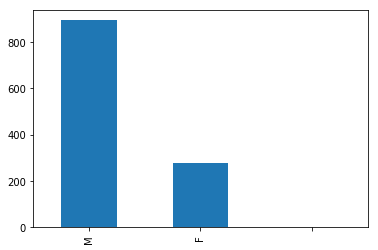

In [68]:
df.gender.value_counts().plot(kind='bar');

#### Top Sources
Out of the 4 sources, `Twitter for iPhone` is clearly the most widely used source to share tweets peratining to dogs.  

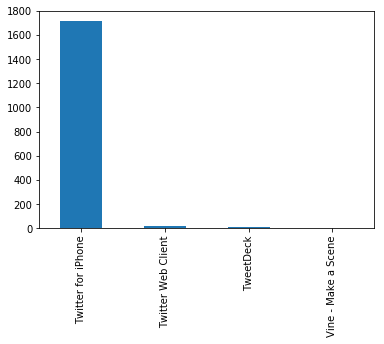

In [69]:
df.source.value_counts().plot(kind='bar');

#### Top Names
`Cooper`, `Lucy`, `Tucker` and `Charlie` are the most common dog names.

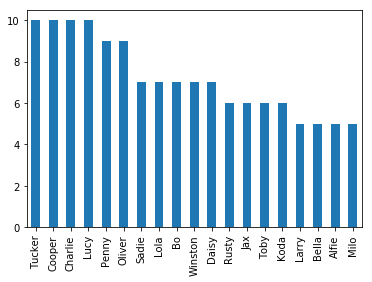

In [70]:
df.name.value_counts()[0:19].plot(kind='bar');

#### Top Breeds
`Golden Retriever` is top breed. 

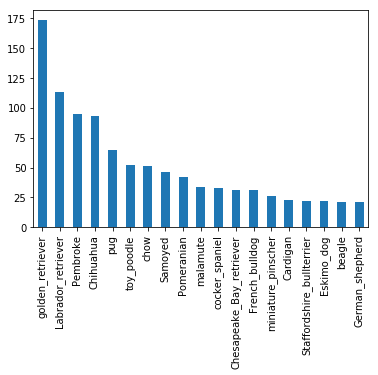

In [71]:
df.breed.value_counts()[0:19].plot(kind='bar');

#### Average Retweet and Favorite counts for dog breeds
`Standard_poodle` had the highest average retweet count while `Saluki` had the highest favorite count.

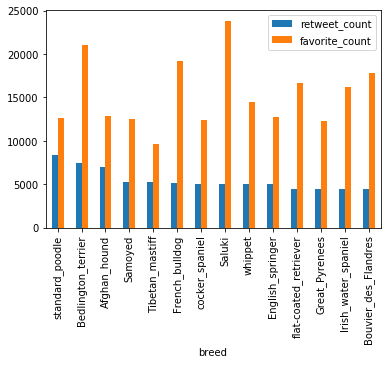

In [72]:
#group by breed and store the means of retweet_count and favorite_count.
df_group = df.groupby(['breed'])['retweet_count', 'favorite_count'].mean()
#order by retweet_count and favorite_count.
df_group = df_group.sort_values(['retweet_count', 'favorite_count'], ascending=False)
#plot the top 15 average counts.
df_group.iloc[0:14,].plot(kind='bar');